# Weather Forecast Analysis

In [1]:
#Libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#Modelling
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

## Autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [18]:
df=pd.read_csv('/Users/sanchana/Desktop/Data_Download/weather_data.csv',index_col='datetime',parse_dates=True)
df.head(2)

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
datetime,,,,,,,,,,,,,,,,,,,,,
1973-01-01,Georgia,14.9,6.8,10.7,14.9,4.5,9.9,2.7,59.5,0.0,...,NaN,NaN,NaN,1973-01-01T07:42:37,1973-01-01T17:40:03,0.90,Overcast,Cloudy skies throughout the day.,cloudy,"72219599999,72219013874,72227013864"
1973-01-02,Georgia,11.4,5.7,8.9,11.4,3.5,7.8,1.9,62.4,0.0,...,NaN,NaN,NaN,1973-01-02T07:42:48,1973-01-02T17:40:49,0.94,Overcast,Cloudy skies throughout the day.,cloudy,"72219599999,72219013874,72227013864"


In [19]:
df = df.loc[df['name'] == 'Oregon']

In [20]:
df = df.drop(['name','feelslikemax','feelslikemin','cloudcover', 'feelslike','snow', 'precipcover', 'preciptype', 'precipprob','snowdepth', 'windgust','winddir', 'severerisk','sunrise','sunset','moonphase','conditions','description','icon', 'stations', 'solarenergy'], axis=1)
df.head(2)

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,sealevelpressure,visibility,solarradiation,uvindex
datetime,,,,,,,,,,,
1973-01-01,9.1,1.7,5.1,2.0,80.6,0.0,22.0,1026.9,15.2,NaN,NaN
1973-01-02,7.2,0.1,3.8,0.6,80.2,3.0,18.4,1017.9,22.4,NaN,NaN


In [22]:
df.isnull().sum()

tempmax                 0
tempmin                 0
temp                    0
dew                     0
humidity                0
precip                149
windspeed               0
sealevelpressure        1
visibility              0
solarradiation      16436
uvindex             16436
dtype: int64

In [21]:
df.describe()

,tempmax,tempmin,temp,dew,humidity,precip,windspeed,sealevelpressure,visibility,solarradiation,uvindex
count,18366.000000,18366.000000,18366.000000,18366.000000,18366.000000,18217.000000,18366.000000,18365.000000,18366.000000,1930.000000,1930.000000
mean,17.254644,6.572928,11.711380,6.507661,73.977649,2.754611,21.213220,1017.699646,21.685054,195.431244,5.632642
std,8.175268,5.234097,6.248984,4.682555,12.693366,6.276164,7.881047,6.387161,14.143640,115.656389,2.866527
min,-8.800000,-17.800000,-11.300000,-19.800000,14.900000,0.000000,5.200000,981.900000,0.100000,1.000000,0.000000
25%,11.100000,2.900000,7.100000,3.600000,64.800000,0.000000,14.900000,1014.100000,15.100000,95.900000,3.000000
50%,16.200000,6.700000,11.300000,6.900000,75.200000,0.000000,20.500000,1017.800000,16.000000,177.700000,6.000000
75%,23.400000,10.700000,16.600000,10.000000,84.200000,2.485000,25.700000,1021.500000,24.100000,288.350000,8.000000
max,46.700000,25.600000,33.000000,17.900000,100.000000,78.400000,74.200000,1039.600000,100.300000,508.900000,10.000000


# EDA

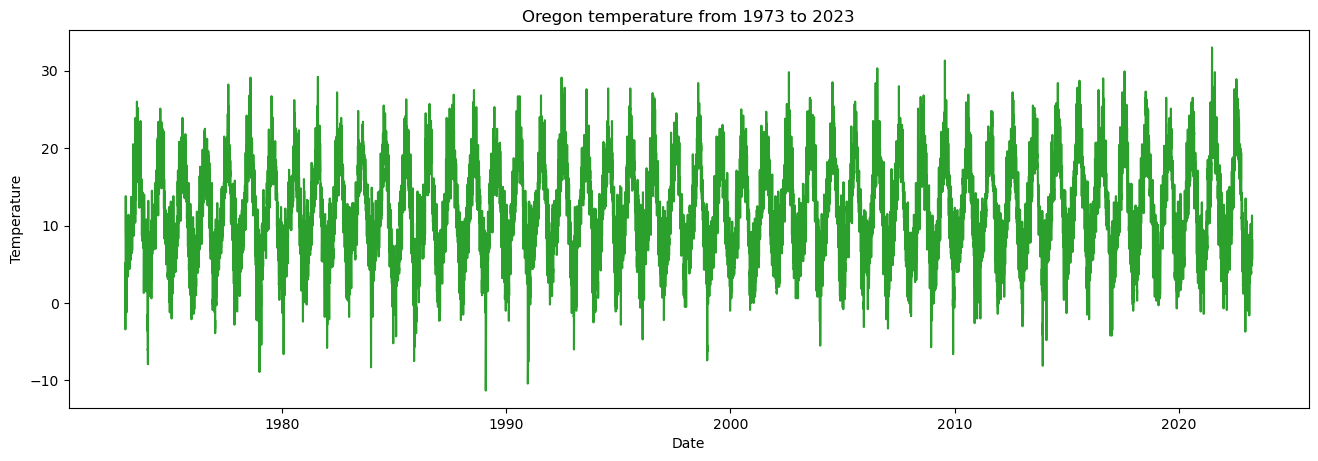

In [23]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Temperature', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:green')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.temp, title='Oregon temperature from 1973 to 2023')  

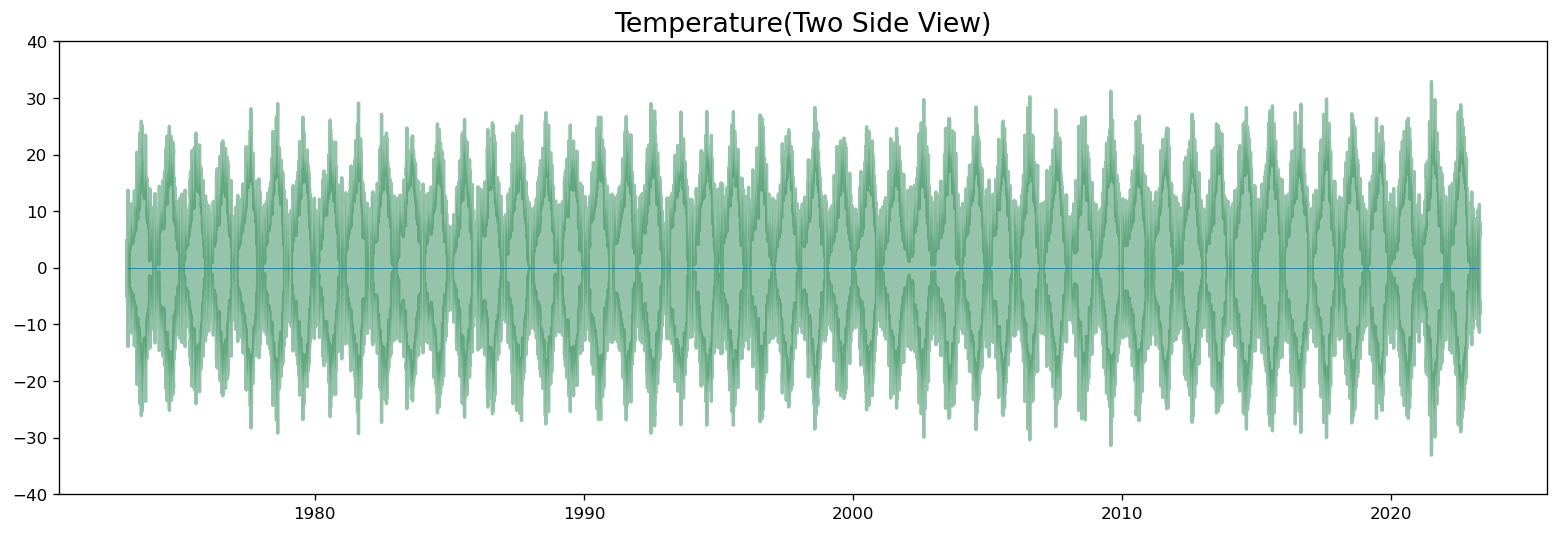

In [24]:
x = df.index.values
y1 = df['temp'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-40, 40)
plt.title('Temperature(Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.index), xmax=np.max(df.index), linewidth=.5)
plt.show()

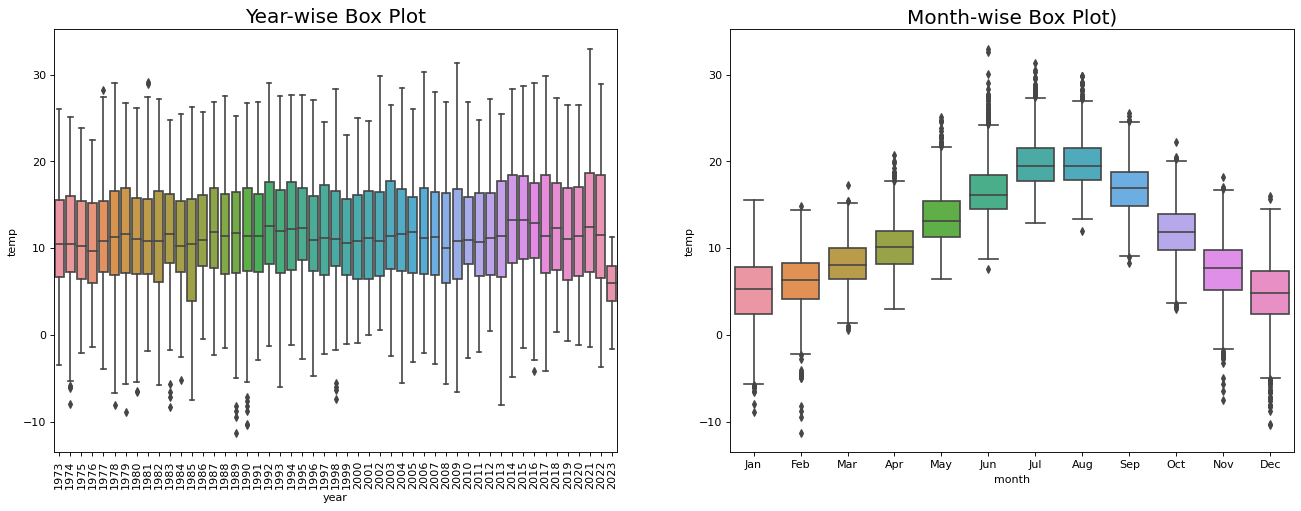

In [25]:
# Draw Plot
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='temp', data=df, ax=axes[0])
sns.boxplot(x='month', y='temp', data=df.loc[~df.year.isin([1973, 2023]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot', fontsize=18); 
axes[1].set_title('Month-wise Box Plot)', fontsize=18)
axes[0].tick_params(axis='x', rotation=90)

plt.show()

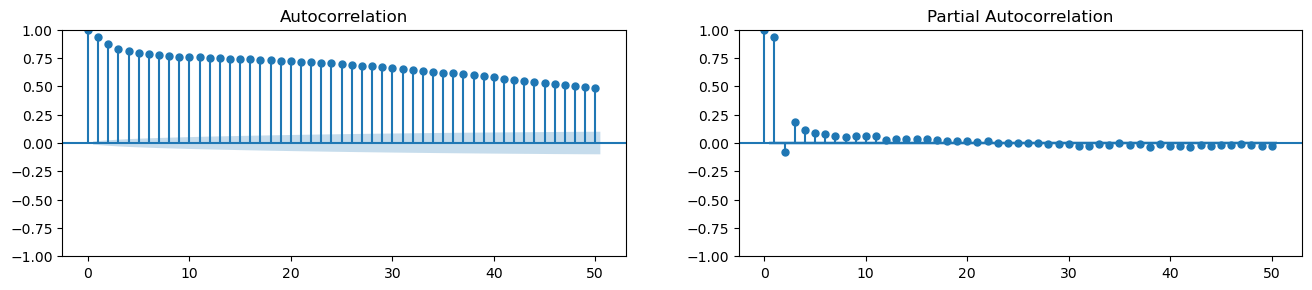

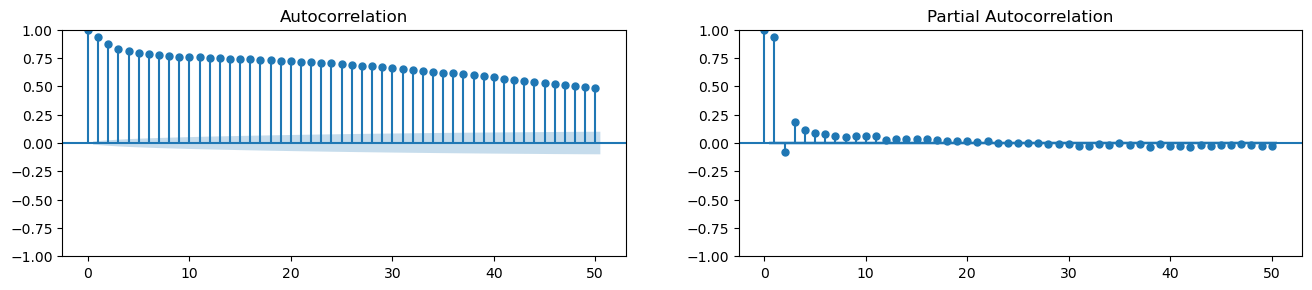

In [26]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.temp.tolist(), lags=50, ax=axes[0])
plot_pacf(df.temp.tolist(), lags=50, ax=axes[1])

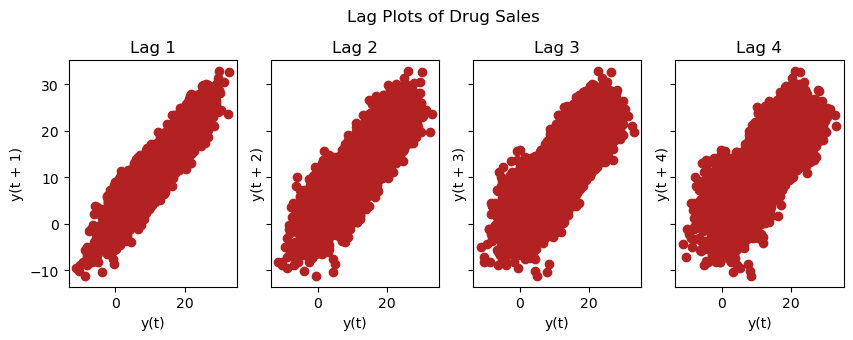

In [27]:
# Plot
from pandas.plotting import lag_plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df.temp, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
    
fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

In [28]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['temp'])

1. ADF :  -10.602891072057334
2. P-Value :  6.106400625860563e-19
3. Num Of Lags :  45
4. Num Of Observations Used For ADF Regression: 18320
5. Critical Values :
	 1% :  -3.4307069987174152
	 5% :  -2.861697780089129
	 10% :  -2.5668539821686513


# ARIMA Model Hyperparameter selection

In [ ]:
stepwise_fit = pm.auto_arima(train.temp, suppress_warnings=True) 

In [31]:
model=ARIMA(df['temp'],order=(1,1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                18336
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -39070.381
Date:                Sun, 23 Apr 2023   AIC                          78150.762
Time:                        10:50:42   BIC                          78189.845
Sample:                    01-01-1973   HQIC                         78163.603
                         - 03-15-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4663      0.022     21.054      0.000       0.423       0.510
ma.L1         -0.4979      0.023    -21.891      0.000      -0.542      -0.453
ma.L2         -0.2683      0.008    -33.578      0.000      -0.284      -0.253
ma.L3         -0.0629      0.012     -5.067      0.000      -0.087      -0.039
sigma2         4.1534      0.039    106.185      0.000       4.077       4.230
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               231.85
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.14
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""